<h1>Project: Blog project - Stack Overflow survey 2022</h1>

<h2>Section 1: Bussiness Understanding</h2>
    <p>Today, IT jobs are one of the most important and with the most demand in the job scenario. With COVID-19 pandemic these jobs turned more important, with the increase of remote works and the necessity of new technologies to assist remote jobs and other things that emerged in this scenario, like oline events.</p>
    <p>Many developers question yourself what degree they need to take a job. If they only need secondary school, bachelor, master, or others. Based in that, I decided to do an analisys to help these people with that. For this, I'll use data from Stack Overflow survey from 2022, that you can access <a href = 'https://insights.stackoverflow.com/survey'>here</a>. I want to emphasize that this work only respond some anserws, many more can be questioned and answered based on this analysys and some more code.</p>
    <p>Some of the questions I'll respond in this work are:</p>
    <ol>
        <li></li>
    </ol>
<p>A resume and more non-technical approach you can see in this <a href = ''>blog post</a></p>

In [31]:
#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#import regex
import re

#import statsmodels
import statsmodels.api as sm

warnings.filterwarnings('ignore')

<h2>Section 2: Data Understanding</h2>

In [32]:
%load_ext pycodestyle_magic

<h3>Gather</h3>

In [33]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [34]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [35]:
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


This schema is used to see what is the question for each column using the function "get_info()" . Something important to note is that there are some columns that are not in this schema. The columns we are insterested are "qname" which is the name of the column and "question" wich is the question.

In [36]:
df.info()

With this we can get a broad perspective of the dataset. For more infomation about each column we can use the fuctino "get_info". Later we will transform the YearsCode column into float and change some column names.

<h3>Assess</h3>

In [39]:
#Select only people who works as developer
df_use = df.query('MainBranch == "I am a developer by profession"')

In [40]:
# Selecting necessary columns
df_use = df[['Employment', 'RemoteWork', 'EdLevel', 'DevType',
             'YearsCode', 'Age', 'OrgSize', 'Country',
             'Gender', 'Knowledge_4', 'Knowledge_7',
             'Frequency_1', 'TimeSearching', 'TimeAnswering',
             'TrueFalse_1', 'ConvertedCompYearly']]

In [13]:
# As we are interested in studying relationships with educational level, we will drop those columns with none answers
df_use = df_use[df_use.EdLevel.notnull()]

EdLevel                    0
Country                    0
Gender                     0
Employment                57
YearsCode                367
Age                      753
DevType                10331
RemoteWork             12710
OrgSize                20582
Salary                 33517
TimeSearching          35390
TimeAnswering          35567
InvolvedOnboarding     35766
NeedingHelp            36213
AbleFindAnswers        36485
WaitingAnswersInter    36604
dtype: int64

61258     0
39630     0
63505     0
63507     0
63508     0
         ..
98       12
28092    12
20438    13
26600    13
72531    13
Length: 71571, dtype: int64

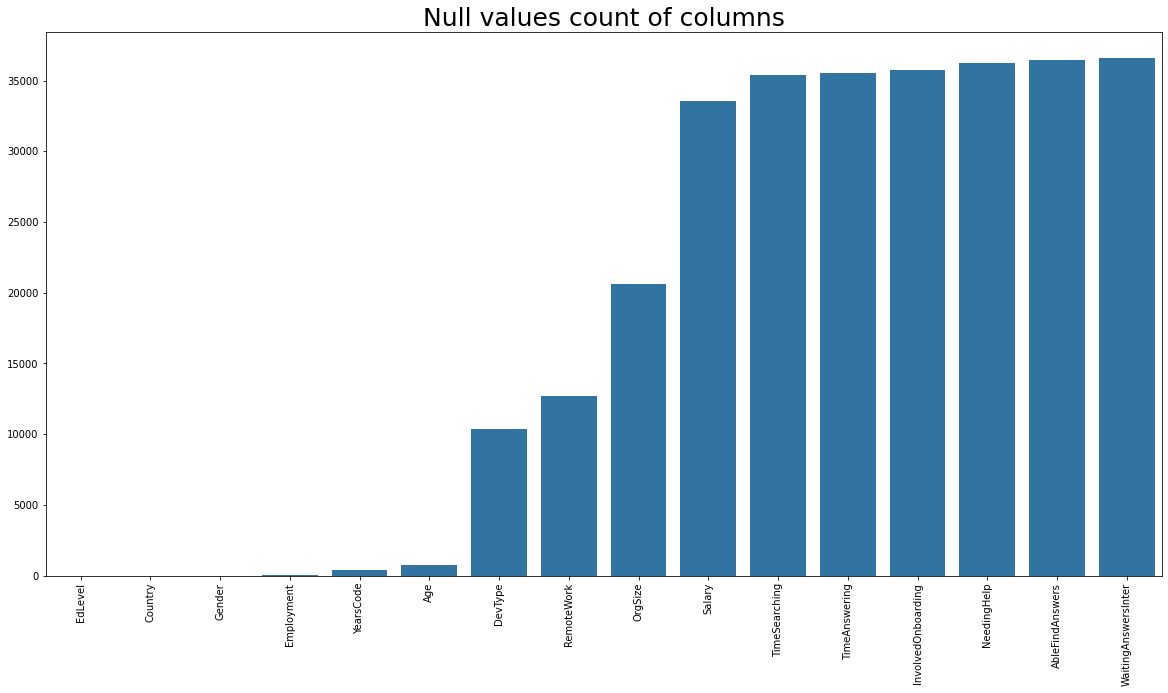

In [18]:
# Analysing null values
display(df_use.isnull().sum(axis = 0).sort_values())
display(df_use.isnull().sum(axis = 1).sort_values())

plt.figure(figsize = (20,10));
sns.barplot(df_use.isnull().sum(axis = 0).sort_values().index, df_use.isnull().sum(axis = 0).sort_values(), color = sns.color_palette()[0]);
plt.xticks(rotation = 90);
plt.title('Null values count of columns', size = 25);

In [20]:
# Rows with less than 5 values has no value information
df_use.dropna(how = 'all', thresh = 4, inplace = True)

In [28]:
sns.set_theme(rc = {'figure.figsize':(12, 8)}, style = 'whitegrid')

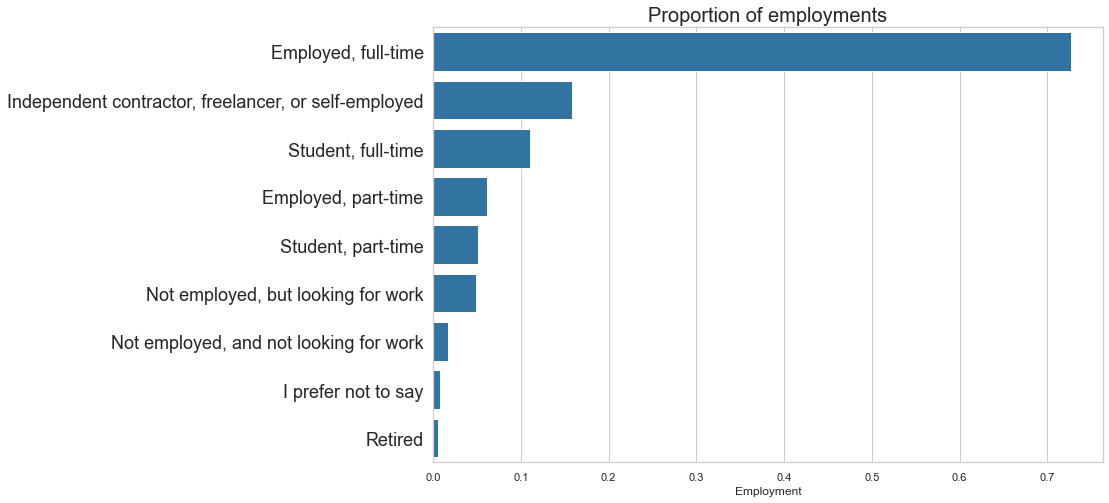

In [29]:
countplot_normalized_exploded(df_use, 'Employment');
plt.title('Proportion of employments', fontsize = 20);
plt.yticks(ticks = range(9), fontsize = 18);

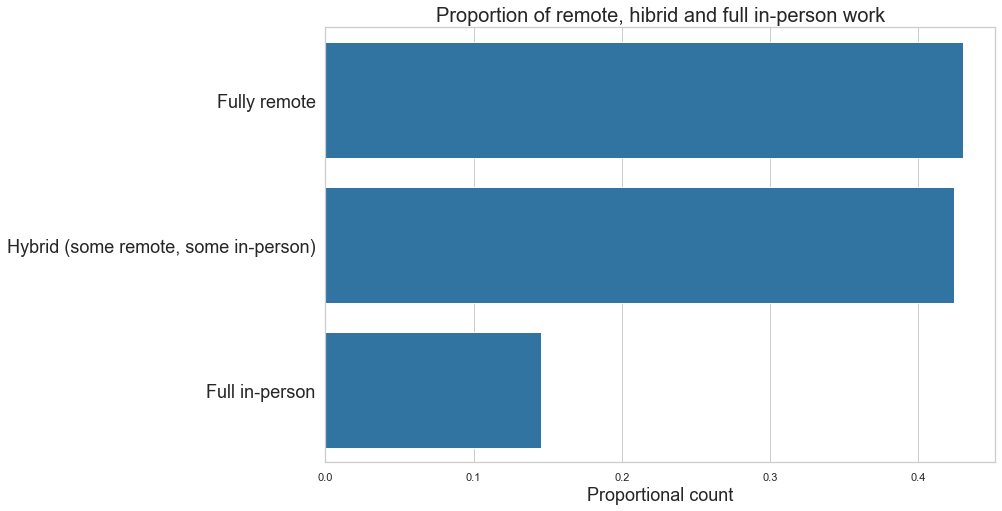

In [30]:
countplot_normalized(df_use, 'RemoteWork')
plt.title('Proportion of remote, hibrid and full in-person work', fontsize = 20)
plt.xlabel('Proportional count', fontsize = 18);
plt.yticks(ticks = range(3), fontsize = 18);

Text(0.5, 1.0, 'Histogram of years coding experience')

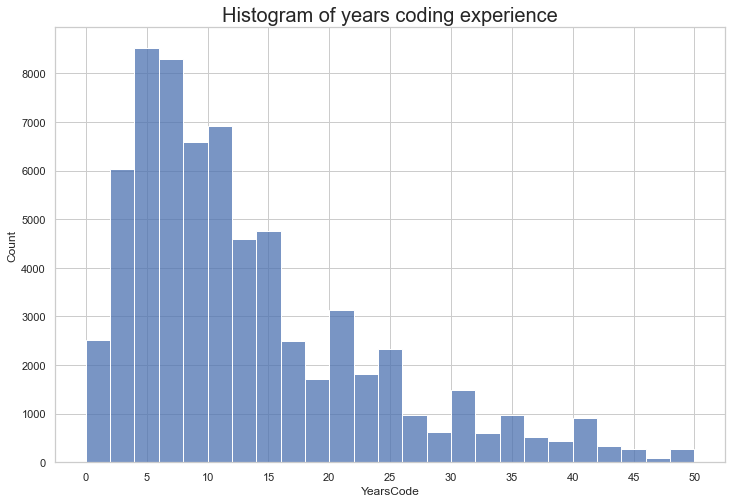

In [33]:
sns.histplot(df_use['YearsCode'], binwidth = 2);
plt.xticks(range(0, 55, 5));
plt.title('Histogram of years coding experience', fontsize = 20)

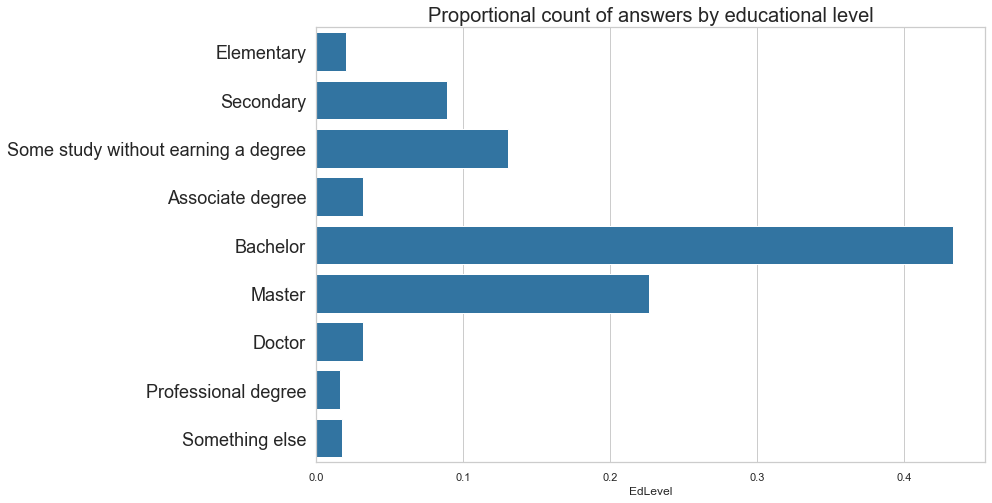

In [31]:
countplot_normalized(df_use, 'EdLevel', order = order_EdLevel);
plt.title('Proportional count of answers by educational level', fontsize = 20);
plt.yticks(ticks = range(0, 9), labels = order_EdLevel, fontsize = 18);

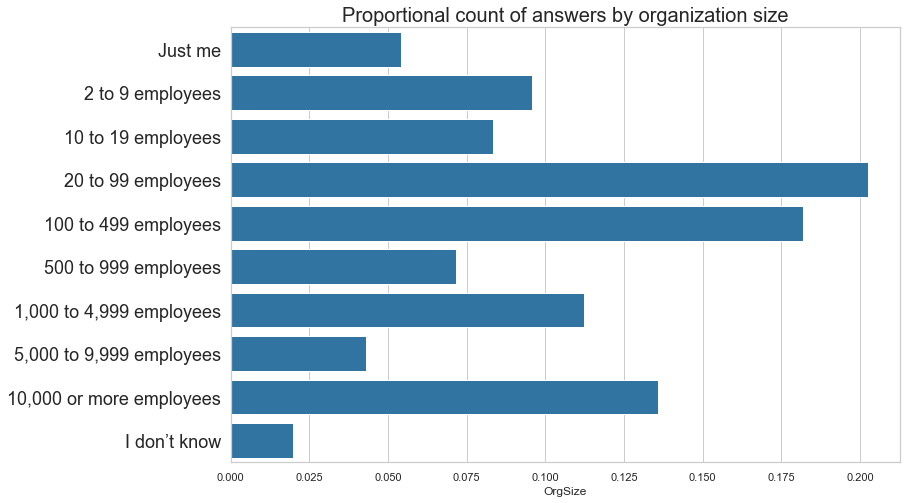

In [34]:
countplot_normalized(df_use, 'OrgSize', order = order_OrgSize);
plt.title('Proportional count of answers by organization size', fontsize = 20);
plt.yticks(ticks = range(10), labels = order_OrgSize, fontsize = 18);

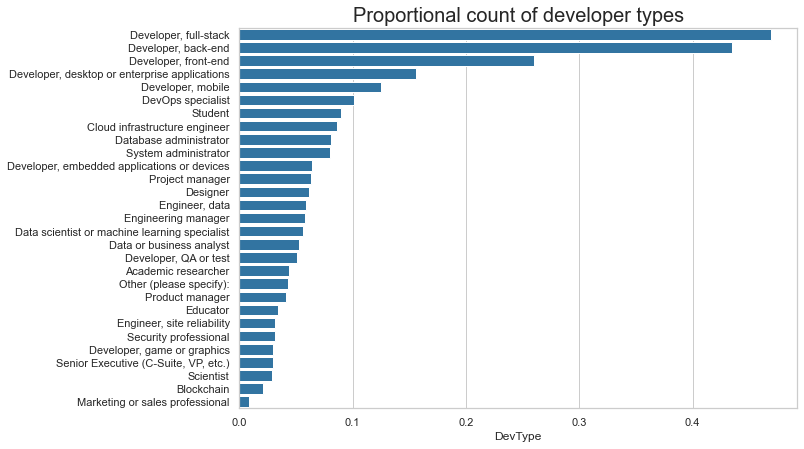

In [32]:
plt.figure(figsize = (10, 7))
countplot_normalized_exploded(df_use, 'DevType')
plt.title('Proportional count of developer types', fontsize = 20);

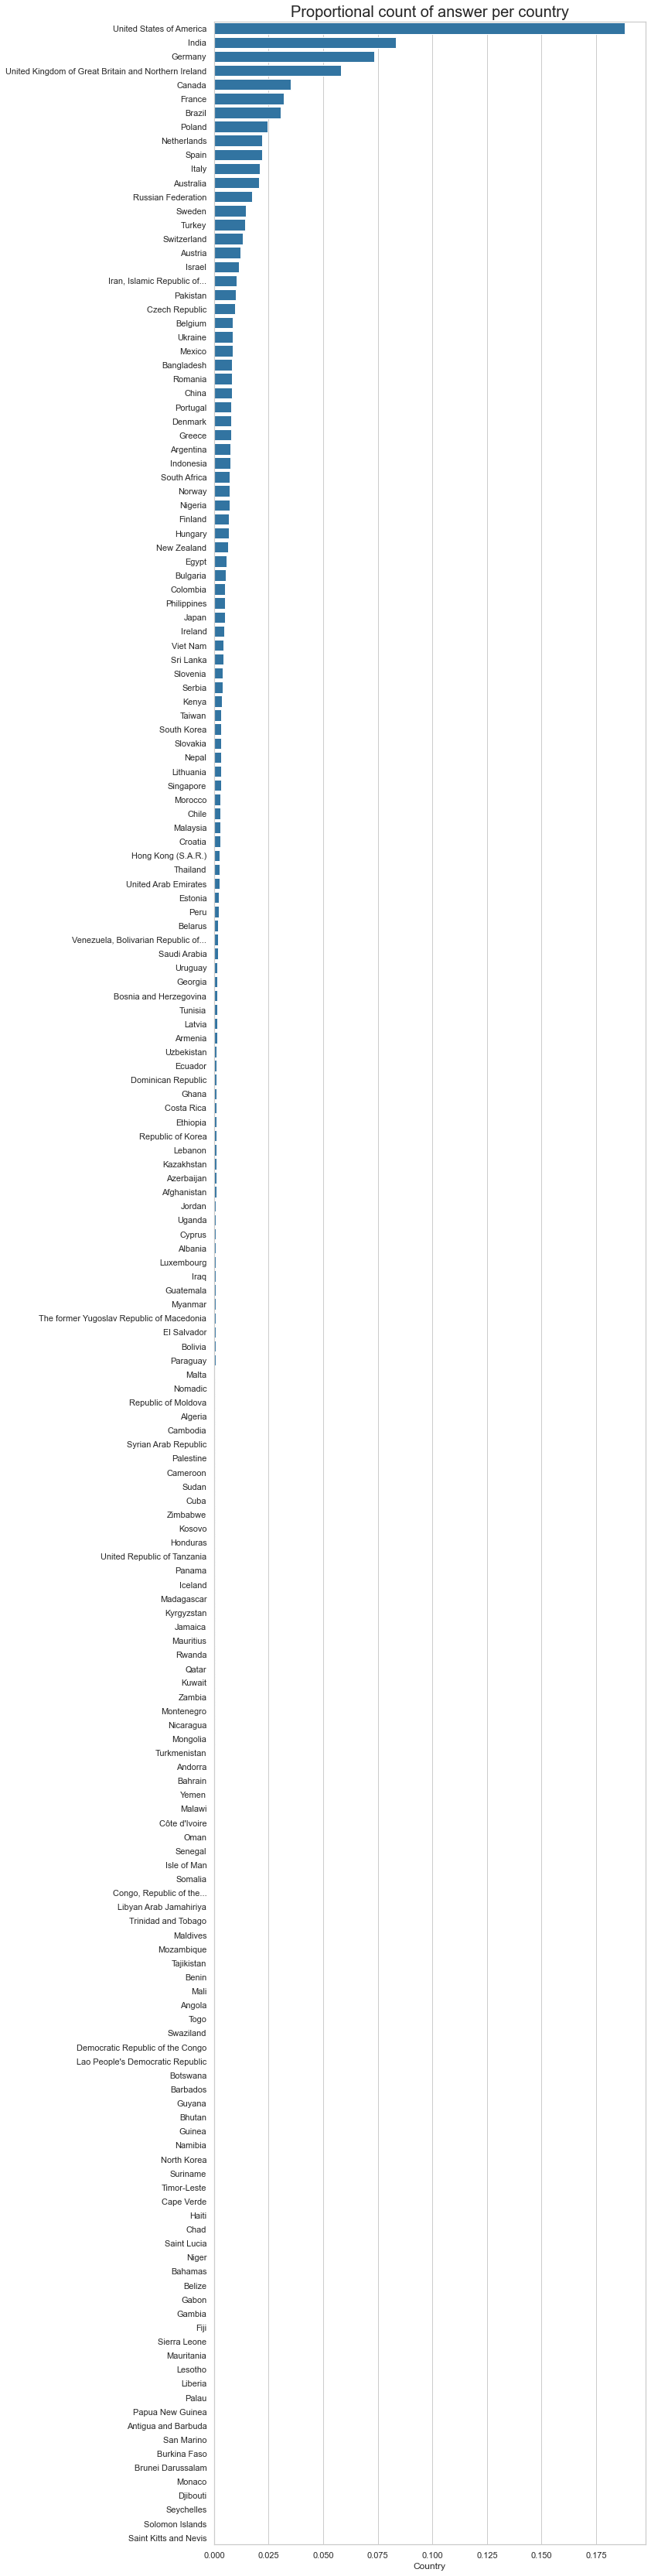

In [35]:
plt.figure(figsize = (10, 60))
countplot_normalized(df_use, 'Country');
plt.title('Proportional count of answer per country', fontsize = 20);

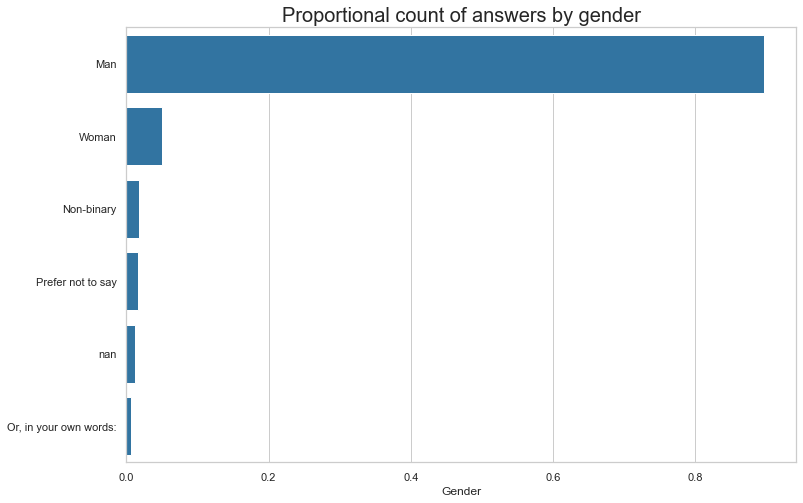

In [36]:
countplot_normalized(df_use, 'Gender');
plt.title('Proportional count of answers by gender', fontsize = 20);

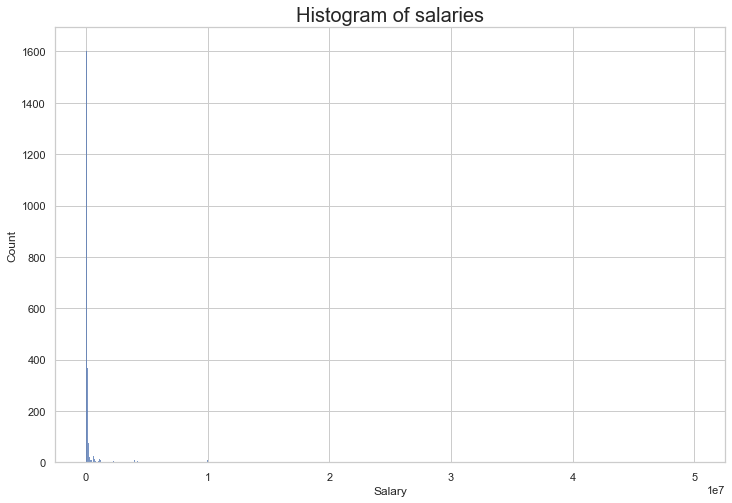

In [37]:
sns.histplot(df_use['Salary']);
plt.title('Histogram of salaries', fontsize = 20);

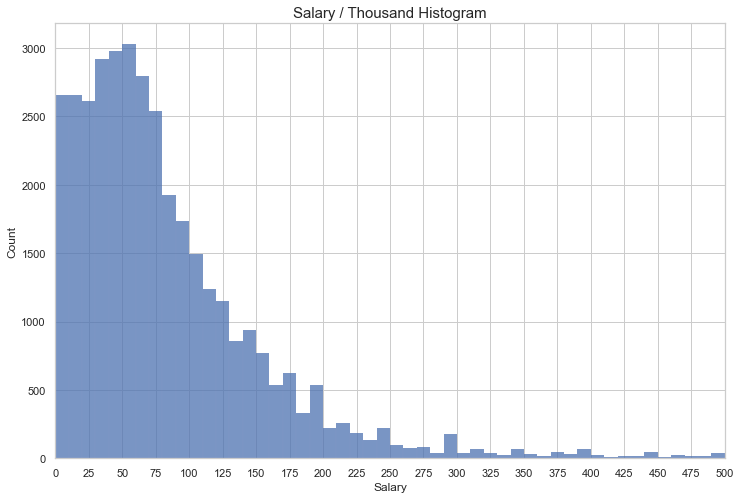

In [38]:
plt.title('Salary / Thousand Histogram', fontsize = 15);
sns.histplot(x = 'Salary', data = df_use, binwidth = 10000);
plt.xlim((0, 500000));
plt.xticks(ticks = np.arange(0,525e3, 25e3), labels = np.arange(0,525, 25));

<h2>Data Preparation</h2>

<h3>Functions</h3>

In [38]:
def get_info(column, df, schema, info = 'question'):
    
    '''Shows question and answers of the column
    
    INPUT:
    column - column of the dataframe
    schema - dataframe with the informations
    info - information to show
    
    OUTPUT:
    print question and answers 
    '''
    
    question = list(schema[schema['qname'] == column][info])[0]
    
    print('Question: {}\n Answers: {}'.format(question, df[column].unique()))



def explode(data, column):

    '''Explode a column with more than one answer marked to for a dataframe with one 
    answer per row.
    
    INPUT: 
    data - daframe with the column to be exploded
    column - column wich will be exploded]
    
    OUTPUT:
    df_exploded - dataframe exploded'''

    column_to_explode = data[column].str.split(';')
    df_to_explode = data.join(column_to_explode, lsuffix = '_original')
    df_exploded = df_to_explode.explode(column)
    
    return df_exploded



def replace_answers(column, order, df, inplace = False):
    
    '''replace a answer with more than one option marked for answer with one option.
    
    INPUT:
    column - column where the answers will be replaced
    order - order which answers will be replaced, the answer will be replaced by element 
    that appears first
    df - dataframe
    inplace - whether or not the dataframe will be substituted

    OUTPUT: 
    dataframe with answers substituted
    '''

    df[column] = df[column].astype(str)
    for i in range(len(order)):
        for answer in df[column].unique():
            if re.search(order[i], answer):
                replace_by = order[i]
        
                df[column].replace({answer : replace_by}, inplace = inplace)
    
    return df 



def countplot_normalized(data, y = None, x = None ,orient = None, sort = True, 
                         ascending = False, bins = None, dropna = True, 
                         color = sns.color_palette()[0], order = None, rotation = 90, 
                         palette = None):
    
    '''function similar to countplot function from seaborn, but with values of count 
    normalized
    
    INPUT:
    data, y, x, orient, color, palette - see in barplot function from seaborn
    normalize, sort, ascending, bins, dropna - see in value_counts method from pandas
    
    OUTPUT:
    chart similar to countplot function from seaborn
    '''

    if y != None:
        count = data[y].value_counts(normalize = True, sort = sort, ascending = ascending,
                                     bins = bins, dropna = dropna)
        if order is not None:
            count = count.reindex(order)
        plot = sns.barplot(count, count.index, color = color, orient = orient,
                           palette = palette)

    if x != None:
        count = data[x].value_counts(normalize = True, sort = sort, ascending = ascending,
                                     bins = bins, dropna = dropna)
        if order is not None:
            count = count.reindex(order)
        plot = sns.barplot(count.index,count , color = color, orient = orient, 
                           palette = palette)
        plt.xticks(rotation = rotation)
        


def countplot_normalized_exploded(data, y = None, x = None ,orient = None, sort = True, 
                                  ascending = False, bins = None, dropna = True,
                                  color = sns.color_palette()[0], order = None, 
                                  rotation = 90, palette = None):
    
    '''function similar to countplot function from seaborn and countplot_normalized, 
    but with values of count normalized. This function is the substituted for 
    countplot_normalize for column that need to be exploded. The sum of values won't be
    1
    
    INPUT:
    data - non-exploded data
    y, x, orient, color, palette - see in barplot function from seaborn
    normalize, sort, ascending, bins, dropna - see in value_counts method from pandas
    
    OUTPUT:
    chart similar to countplot function from seaborn
    '''
    
    if y != None:
        exploded_data = explode(data, y)
        count = exploded_data[y].value_counts(sort = sort, ascending = ascending,
                                              bins = bins, dropna = dropna)/data[y].count()
        if order is not None:
            count = count.reindex(order)
        sns.barplot(count, count.index, color = color, orient = orient,
                           palette = palette)

        
    if x != None:
        exploded_data = explode(data, x)
        count = exploded_data[x].value_counts(sort = sort, ascending = ascending, 
                                              bins = bins, dropna = dropna)/data[x].count()
        if order is not None:
            count = count.reindex(order)
        sns.barplot(count.index,count , color = color, orient = orient,
                           palette = palette)
        plt.xticks(rotation = rotation)

<h3>Clean</h3>

In [41]:
# Renaming non-descriptive column names
df_use.rename(columns={'Knowledge_4' : 'AbleFindAnswers', 
                       'Knowledge_7' : 'WaitingAnswersInter', 
                       'Frequency_1' : 'NeedingHelp', 
                       'TrueFalse_1' : 'InvolvedOnboarding', 
                       'ConvertedCompYearly' : 'Salary'}, inplace=True)
schema.replace({'Knowledge_4' : 'AbleFindAnswers',  
                'Knowledge_7' : 'WaitingAnswersInter', 
                'Frequency_1' : 'NeedingHelp', 
                'TrueFalse_1' : 'InvolvedOnboarding',
                'ConvertedCompYearly' : 'Salary'}, inplace=True)

In [42]:
# Renaming EdLevel values
df_use.replace({'Primary/elementary school' : 'Elementary',
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary', 
                'Some college/university study without earning a degree':'Some study without earning a degree',
                'Associate degree (A.A., A.S., etc.)' : 'Associate degree',
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelor', 
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Master', 
                'Other doctoral degree (Ph.D., Ed.D., etc.)' : 'Doctor', 
                'Professional degree (JD, MD, etc.)':'Professional degree'}, inplace = True)

In [14]:
# Cleaning column "Gender"
replace_answers(column = 'Gender', order = ['Non-binary, genderqueer, or gender non-conforming', 
                                            'Or, in your own words:'],df = df_use, inplace = True)
df_use['Gender'].replace({'Man;Woman': 'Non-binary, genderqueer, or gender non-conforming'}, inplace = True)
df_use['Gender'].replace({'Non-binary, genderqueer, or gender non-conforming' : 'Non-binary'}, inplace = True)

In [15]:
# Improving the name of the value
df_use['OrgSize'].replace({'Just me - I am a freelancer, sole proprietor, etc.': 'Just me'}, inplace = True)

In [17]:
# Transforming years coding values from string to float
df_use['YearsCode'].replace({'Less than 1 year' : '0', 'More than 50 years' : '50'}, inplace = True)
df_use['YearsCode'] = df_use['YearsCode'].astype(float)

In [19]:
df_use.drop_duplicates(inplace = True)

<h3> DataFrames</h3>
In this Section I'm organizing the dataframes that I'll use later in the notebook.

In [21]:
top_10_countries = df_use[df_use['Country'].isin(df_use.Country.value_counts().head(10).index)]

In [22]:
df_use_250k = df_use.query('Salary <= 250000')

In [23]:
top_10_countries_250k_non_null = top_10_countries[top_10_countries.Salary.notnull() & top_10_countries.YearsCode.notnull() & (top_10_countries.Salary <= 250000)]
top_10_countries_250k_non_null['intercept'] = 1

top_10_countries_250k_non_null[sorted(top_10_countries.Country.unique())] = pd.get_dummies(top_10_countries_250k_non_null['Country'])

for Country in sorted(top_10_countries.Country.unique()):
    top_10_countries_250k_non_null[Country + '_code'] = top_10_countries_250k_non_null[Country] * top_10_countries_250k_non_null['YearsCode']

top_10_countries_250k_non_null[sorted(top_10_countries_250k_non_null.EdLevel.unique())] = pd.get_dummies(top_10_countries_250k_non_null.EdLevel)

for ed in sorted(top_10_countries_250k_non_null.EdLevel.unique()):
    top_10_countries_250k_non_null[ed + '_code'] = top_10_countries_250k_non_null[ed] * top_10_countries_250k_non_null['YearsCode']


<h3> Exploded dataframes</h3>
In this section there are 2 dataframes that I'll use later wich were needed to explode using the "explode()" function.

In [24]:
exploded_DevType = explode(df_use, 'DevType')

In [25]:
exploded_Employment = explode(df_use, 'Employment')

<h3> Orders of column values</h3>
    In this section I set the crescenting order of some ordinal categorical values. I'll use this in the analysis later.

In [26]:
order_Age = ['Under 18 years old',
 '18-24 years old',
 '25-34 years old',
 '35-44 years old',
 '45-54 years old',
 '55-64 years old',
 '65 years or older',
 'Prefer not to say']

order_DevType = list(exploded_DevType.DevType.value_counts().index)

order_OrgSize = ['Just me',
 '2 to 9 employees',
 '10 to 19 employees',
 '20 to 99 employees',
 '100 to 499 employees',
 '500 to 999 employees',
 '1,000 to 4,999 employees',
 '5,000 to 9,999 employees',
 '10,000 or more employees',
 'I don’t know']

order_EdLevel = ['Elementary',
 'Secondary',
 'Some study without earning a degree',
 'Associate degree',
 'Bachelor',
 'Master',
 'Doctor',
 'Professional degree',
 'Something else']

<h3> Palettes</h3> 
Palettes I'll use later in some graphs

In [27]:
palette_DevType = ['#D61C4E' if Type in ['Data scientist or machine learning specialist',
                                         'Academic researcher', 'Educator', 'Scientist']
                   else '#FEDB39' if Type in ['Student']
                   else '#293462'  
                   for Type in order_DevType]

palette_EdLevel = ['#F637EC' if EdLevel in ['Bachelor', 'Master', 'Doctor'] 
                   else '#3330E4'
                   for EdLevel in order_EdLevel]

## EDA

### One dimensional EDA

<h2>Evaluation</h2>

<h3>Question 1: What's the relationship between salary and educational level</h3>

This boxplot provides an overview of the relationship between salary and educational level

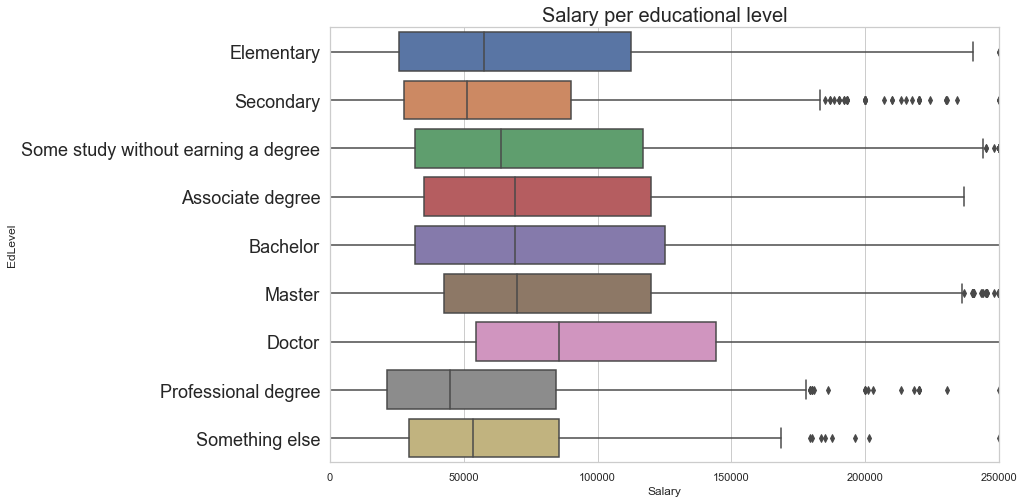

In [39]:
sns.boxplot(x = 'Salary', y = 'EdLevel',  data = df_use, order = order_EdLevel);
plt.title('Salary per educational level', fontsize = 20);
plt.xlim(0, 250000);
plt.yticks(ticks = range(9), fontsize = 18);

In [40]:
# Doctors in general earn 22% more than masters and bachelors
groupby_EdLevel_Salary = df_use.groupby('EdLevel').Salary.median()

groupby_EdLevel_Salary.loc['Doctor'] / groupby_EdLevel_Salary.loc['Master']

1.2216142857142858

We can see that those with master, bachelor and associate degrees gain similary salaries and doctors earn more. We see that those with only elementary school earn more than those with secondary school, this is a strange behavior.

Maybe the experience on coding provides an explication about why those with only elementary school earn more than those with secondary. The boxplot below serves to evaluate that

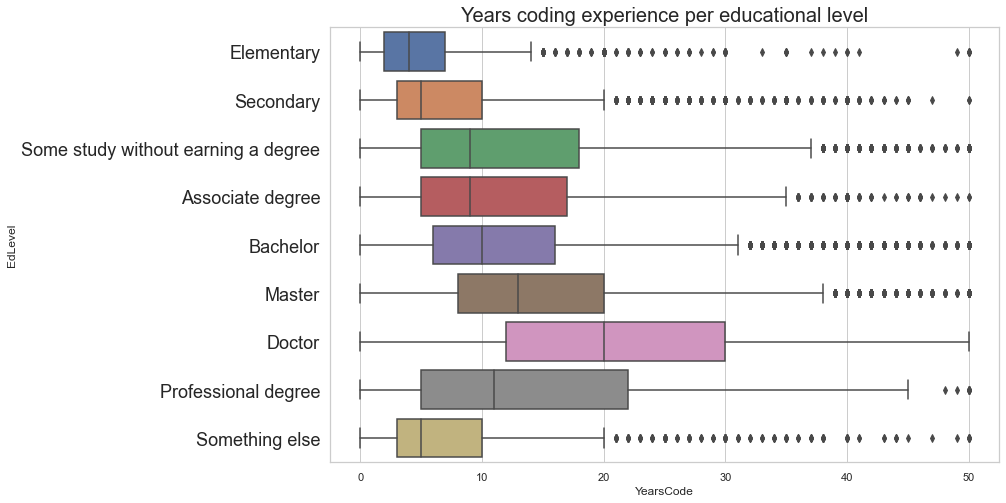

In [41]:
sns.boxplot(data = df_use, x = 'YearsCode', y = 'EdLevel', order = order_EdLevel);
plt.title('Years coding experience per educational level', fontsize = 20);
plt.yticks(ticks = range(9), fontsize = 18);

As we see above, those with secondary school have far more coding experience than those with elementary school. So coding experience is not a explanation for that.
We see here that doctors have far more experience than bachelors, this serves to justify higher salaries

I'll plot a countplot for the relationship between number of people and age for each educational level

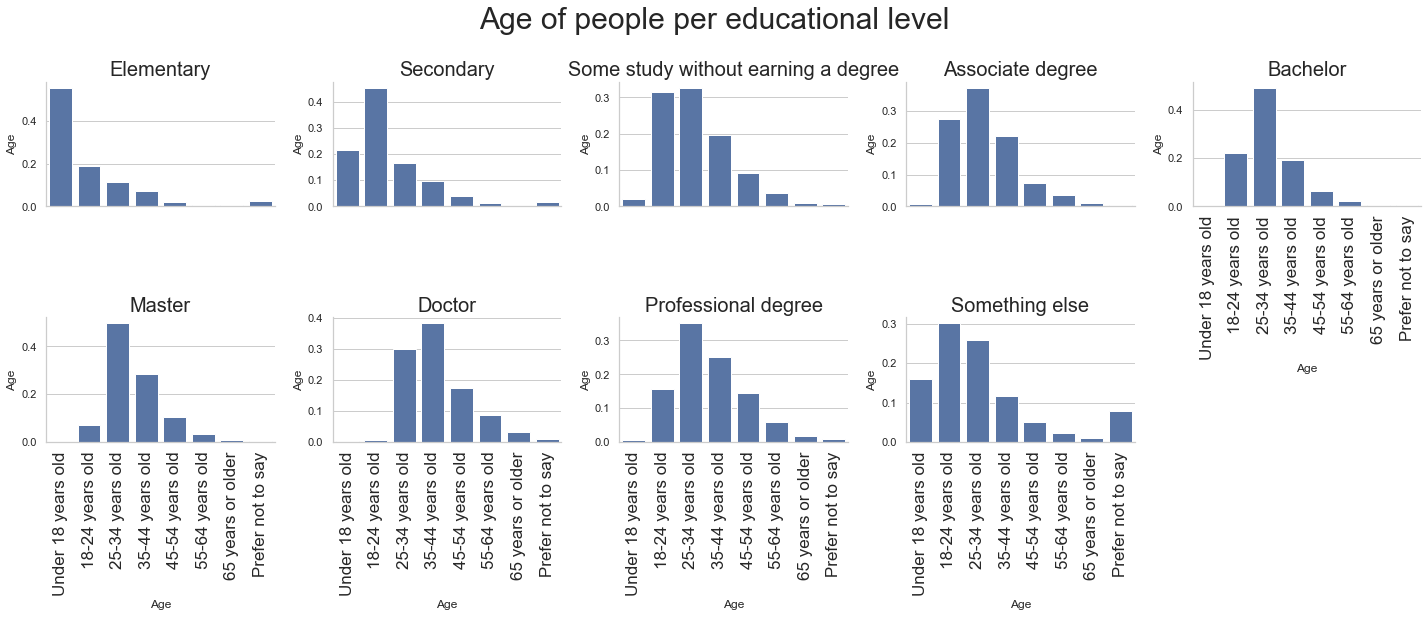

In [42]:
# Age doesn't justify the strange behavior of Elementary salaries
g = sns.FacetGrid(df_use, col = 'EdLevel' , col_wrap = 5, height = 4, sharey = False, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, x = 'Age', order = order_Age);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontsize = 17)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Age of people per educational level', fontsize = 30);

We see that lower age is related to lower degree, as expected. So age doesn't justify the high salary for elementary school

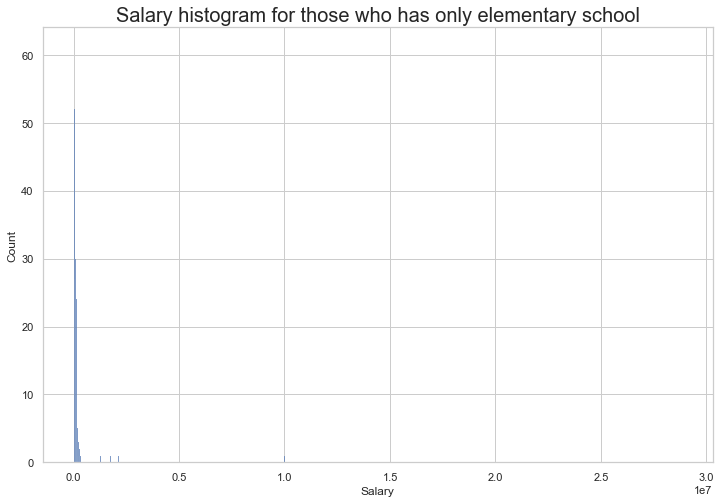

In [43]:
sns.histplot(df_use.query('EdLevel == "Elementary"')['Salary']);
plt.title('Salary histogram for those who has only elementary school', fontsize = 20);

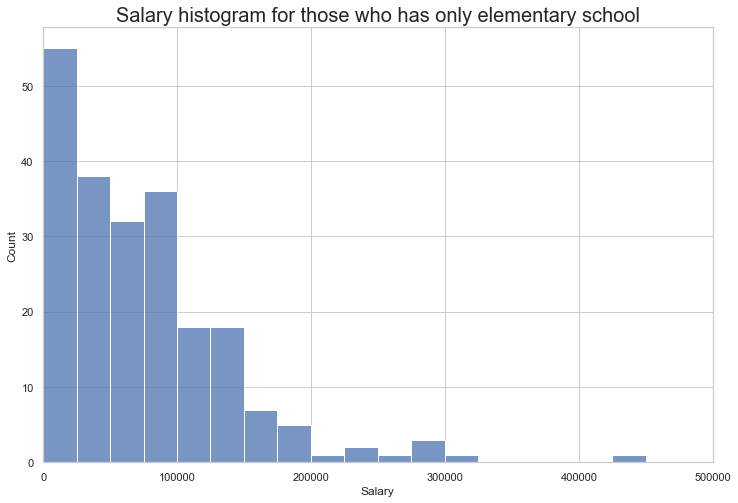

In [44]:
sns.histplot(df_use.query('EdLevel == "Elementary"')['Salary'], bins = range(0, 520000, 25000));
plt.xlim(0, 500000);
plt.title('Salary histogram for those who has only elementary school', fontsize = 20);

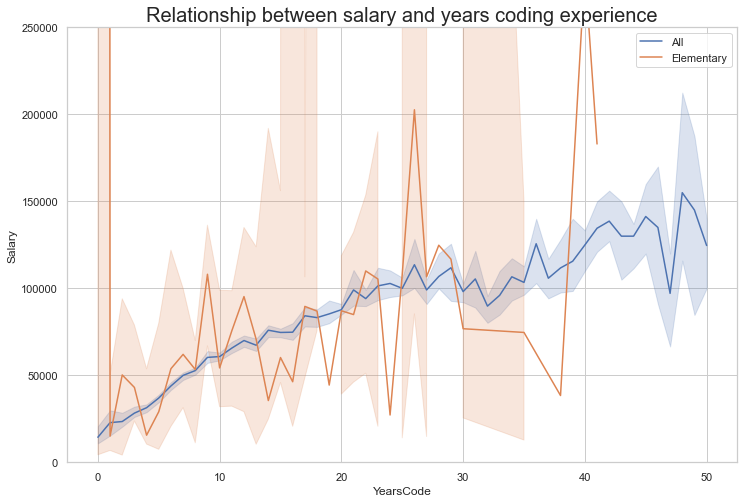

In [45]:
# Salaries in Elementary don't present the average stability trough coding experience years as when considering 
#all educational levels
ax1 = sns.lineplot(x = 'YearsCode', y = 'Salary',estimator = np.median, data = df_use, label = 'All')
ax1.set_ylim([0, 250000])
ax2 = sns.lineplot(x = 'YearsCode', y = 'Salary', estimator = np.median, data = df_use[df_use.EdLevel == 'Elementary'], label = 'Elementary')
ax2.set_ylim([0, 250000]);
plt.title('Relationship between salary and years coding experience', fontsize = 20);

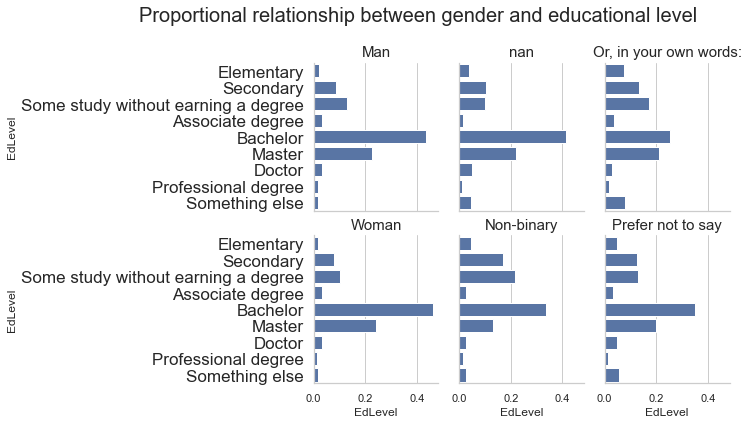

In [46]:
# Queers have less scholarity, are youger, but earn better salaries 
g = sns.FacetGrid(data = df_use, col = 'Gender', col_wrap = 3);
g.map_dataframe(countplot_normalized, y = 'EdLevel', order = order_EdLevel);
g.set_titles(col_template = '{col_name}', size = 15);
g.set_yticklabels(labels = order_EdLevel, fontsize = 17)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Proportional relationship between gender and educational level', fontsize = 20);

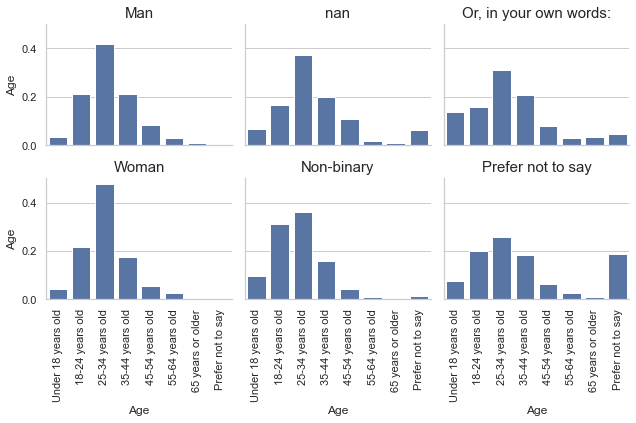

In [47]:
g = sns.FacetGrid(data = df_use, col = 'Gender', col_wrap = 3)
g.map_dataframe(countplot_normalized, x = 'Age', order = order_Age);
g.set_titles(col_template = '{col_name}', row_template = '', size = 15);

Text(0.5, 1.0, 'Salary per gender')

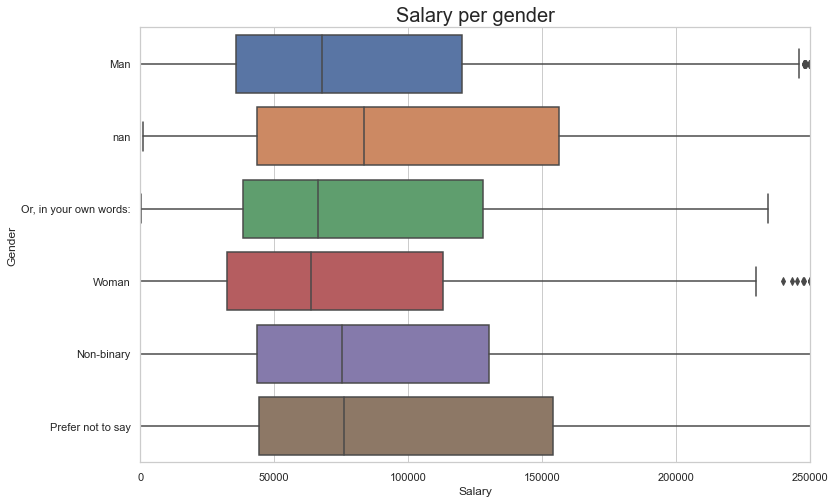

In [48]:
# Queers' and men's salaries are competitive even with queer having less scholarity and less years coding, 
# the lesser salaries of women are acording with years coding experience
sns.boxplot(data = df_use, y = 'Gender', x = 'Salary')
plt.xlim(0,250000);
plt.title('Salary per gender', fontsize = 20)

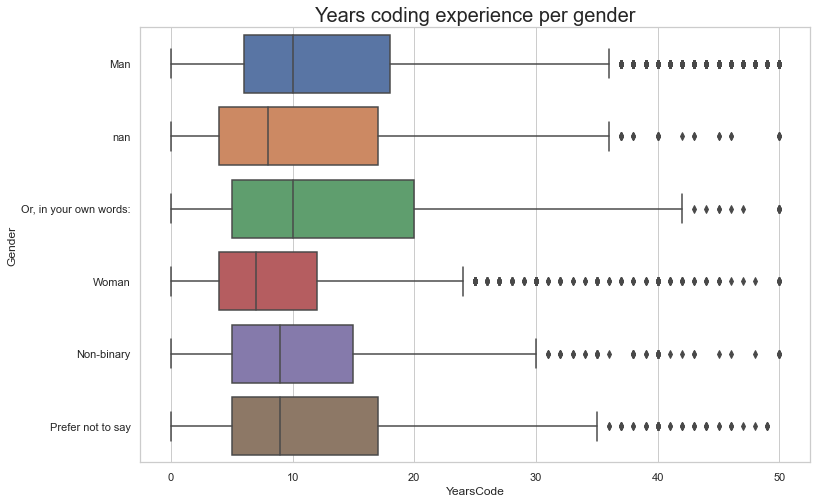

In [49]:
sns.boxplot(x = 'YearsCode', y = 'Gender', data = df_use);
plt.title('Years coding experience per gender', fontsize = 20);

In [50]:
# 34% of Non-binaries, queers and gender non-conformings are in USA. This and the high salaries in USA causes a high impact on the salaries of queers, 
#which justifies what is said above
df_use.groupby('Gender')['Country'].value_counts(normalize = True).loc['Non-binary']

Country
United States of America                                0.334746
Germany                                                 0.088136
United Kingdom of Great Britain and Northern Ireland    0.083898
Canada                                                  0.045763
France                                                  0.042373
                                                          ...   
Timor-Leste                                             0.000847
Uganda                                                  0.000847
United Arab Emirates                                    0.000847
Uruguay                                                 0.000847
Uzbekistan                                              0.000847
Name: Country, Length: 89, dtype: float64

In [51]:
top_10_countries.groupby('Country')['Salary'].median().sort_values(ascending = False)

Country
United States of America                                145000.0
Canada                                                   93701.0
United Kingdom of Great Britain and Northern Ireland     82922.0
Germany                                                  69318.0
Netherlands                                              66119.0
France                                                   51192.0
Spain                                                    47990.0
Poland                                                   47172.0
Brazil                                                   27420.0
India                                                    18576.0
Name: Salary, dtype: float64

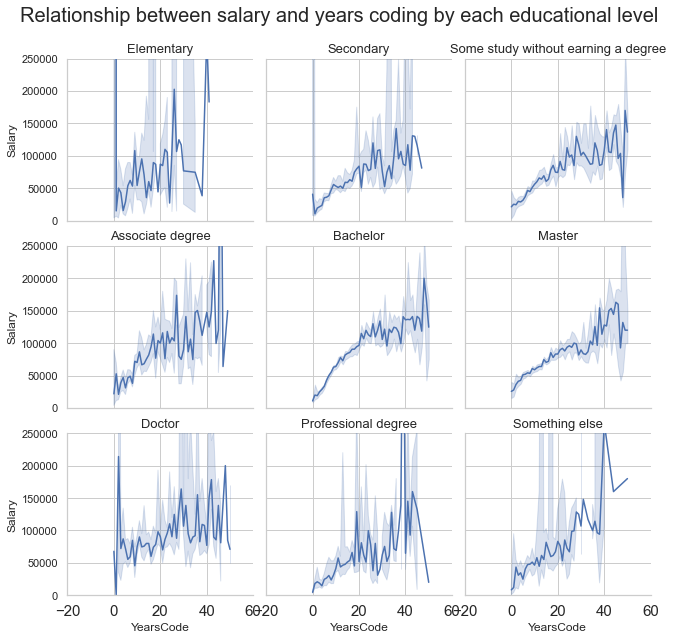

In [52]:
g = sns.FacetGrid(data = df_use, col = 'EdLevel', col_wrap = 3, col_order = order_EdLevel);
g.map(sns.lineplot, 'YearsCode',  'Salary', estimator = np.median);
plt.ylim(0, 250000);
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between salary and years coding by each educational level', fontsize = 20);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontsize = 15);

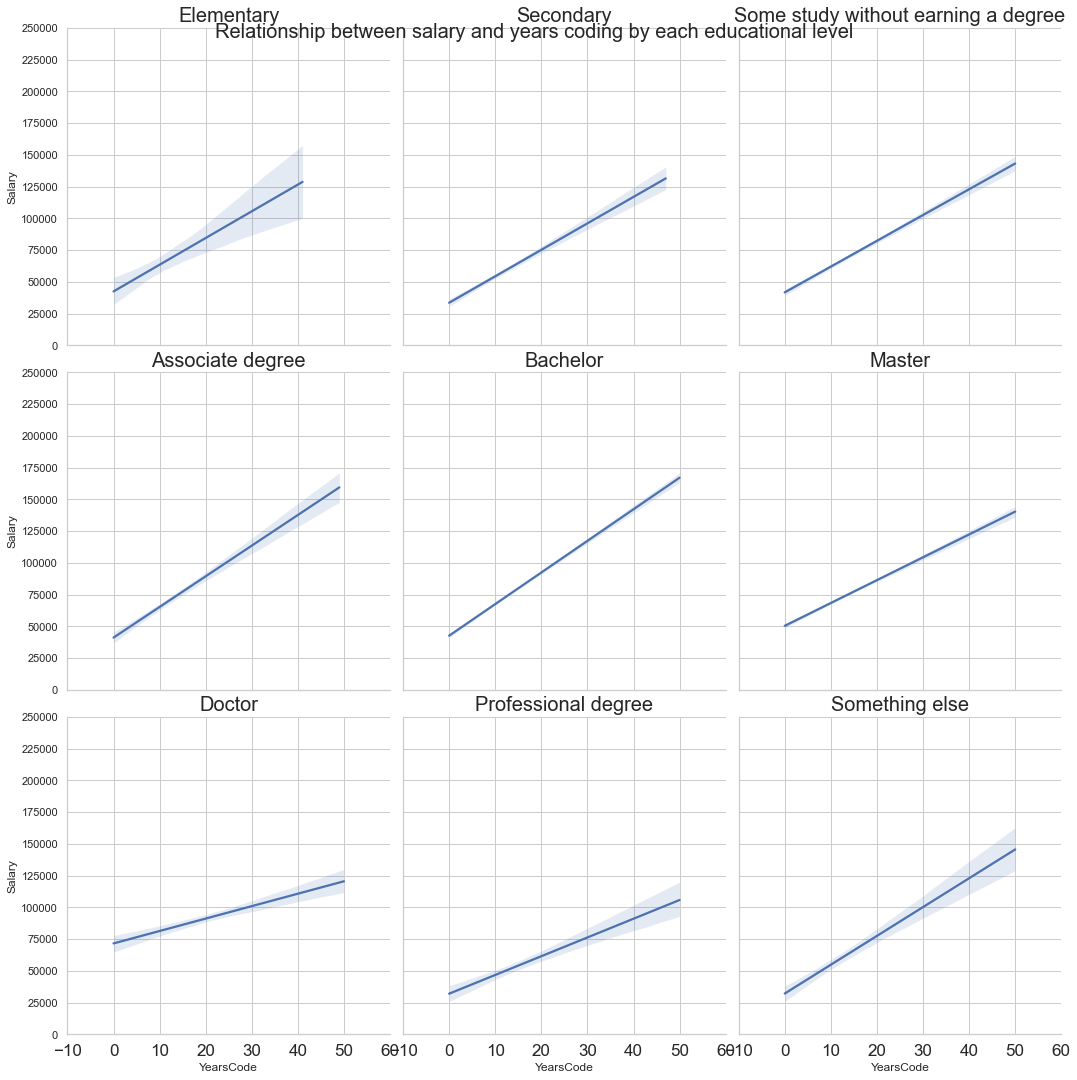

In [53]:
g = sns.lmplot(x = 'YearsCode', y = 'Salary', data = df_use_250k, col = 'EdLevel', col_wrap = 3, scatter_kws = {'alpha': 0}, col_order = order_EdLevel)
plt.ylim(0, 250000)
plt.yticks(np.arange(0, 275000, 25000));
g.fig.suptitle('Relationship between salary and years coding by each educational level', fontsize = 20);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontsize = 17);

In [54]:
columns_lm = list(['intercept']) + list(np.delete([Country for Country in top_10_countries_250k_non_null['Country'].unique()], 0)) + list([EdLevel + '_code' for EdLevel in top_10_countries_250k_non_null['EdLevel'].unique()])  

lm = sm.OLS(top_10_countries_250k_non_null['Salary'], top_10_countries_250k_non_null[columns_lm])
results = lm.fit()

print('Salaries in USA')
for years in np.arange(0, 52, 2):
    print('Master, ', years, ' years', results.predict([1 if value in ['intercept', 'United States of America'] else years if value in ['United States of America_code', 'Master_code'] else 0 for value in columns_lm]))
    print('Doctor, ', years, ' years',results.predict([1 if value in ['intercept', 'United States of America'] else years if value in ['United States of America_code', 'Doctoral_code'] else 0 for value in columns_lm]))
results.summary()

Salaries in USA
Master,  0  years [114835.31105233]
Doctor,  0  years [114835.31105233]
Master,  2  years [117923.10508876]
Doctor,  2  years [114835.31105233]
Master,  4  years [121010.8991252]
Doctor,  4  years [114835.31105233]
Master,  6  years [124098.69316163]
Doctor,  6  years [114835.31105233]
Master,  8  years [127186.48719806]
Doctor,  8  years [114835.31105233]
Master,  10  years [130274.28123449]
Doctor,  10  years [114835.31105233]
Master,  12  years [133362.07527092]
Doctor,  12  years [114835.31105233]
Master,  14  years [136449.86930736]
Doctor,  14  years [114835.31105233]
Master,  16  years [139537.66334379]
Doctor,  16  years [114835.31105233]
Master,  18  years [142625.45738022]
Doctor,  18  years [114835.31105233]
Master,  20  years [145713.25141665]
Doctor,  20  years [114835.31105233]
Master,  22  years [148801.04545308]
Doctor,  22  years [114835.31105233]
Master,  24  years [151888.83948952]
Doctor,  24  years [114835.31105233]
Master,  26  years [154976.633525

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1258.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:03:27   Log-Likelihood:            -2.5560e+05
No. Observations:               21279   AIC:                         5.112e+05
Df Residuals:                   21260   BIC:                         5.114e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
intercept                                 6.339e+04    956.718     66.256      0.000    6.15e+04    6.53e+04
Netherlands                              -1.035e+04   1595.065     -6.487      0.000   -1.35e+04   -7221.019
United States of America                  5.145e+04    949.133     54.205      0.000    4.96e+04    5.33e+04
Canada                                    1.376e+04   1362.712     10.096      0.000    1.11e+04    1.64e+04
Germany                                  -1.164e+04   1135.430    -10.248      0.000   -1.39e+04   -9410.311
Poland                                   -2.628e+04   1539.235    -17.074      0.000   -2.93e+04   -2.33e+04
France                                   -2.596e+04   1400.851    -18.532      0.000   -2.87e+04   -2.32e+04
Brazil                                    -4.17e+04   1401.337    -29.760      0.000   -4.45e+04    -3.9e+04
Spain                                    -2.877e+04   1576.645    -18.245      0.000   -3.19e+04   -2.57e+04
India                                     -4.67e+04   1223.880    -38.159      0.000   -4.91e+04   -4.43e+04
Master_code                               1543.8970     38.020     40.608      0.000    1469.375    1618.419
Bachelor_code                             1278.5097     35.532     35.982      0.000    1208.864    1348.155
Something else_code                        777.2021    175.811      4.421      0.000     432.599    1121.805
Associate degree_code                      878.0691     83.817     10.476      0.000     713.780    1042.358
Some study without earning a degree_code  1150.4552     48.166     23.885      0.000    1056.047    1244.864
Secondary_code                             992.0226     91.711     10.817      0.000     812.263    1171.782
Professional degree_code                  1095.7669    120.854      9.067      0.000     858.883    1332.651
Doctor_code                               1163.0587     61.962     18.771      0.000    1041.609    1284.508
Elementary_code                           1466.4079    285.473      5.137      0.000     906.858    2025.957
==============================================================================
Omnibus:                     2876.061   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6457.858
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.165   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

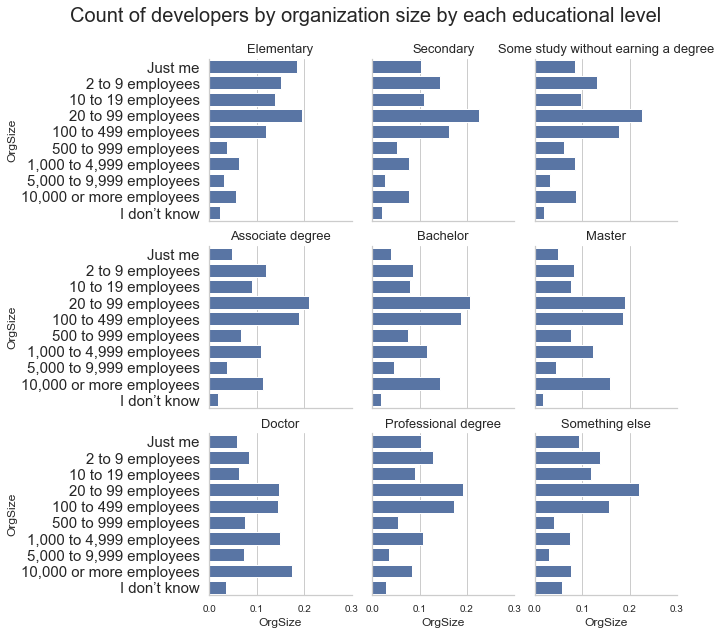

In [55]:
#With increase of titulation there is an increase in company
g = sns.FacetGrid(df_use, col = 'EdLevel' , col_wrap = 3, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'OrgSize', order = order_OrgSize);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontdict = {'fontsize': 10});
g.set_yticklabels(labels = order_OrgSize, fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers by organization size by each educational level', fontsize = 20);

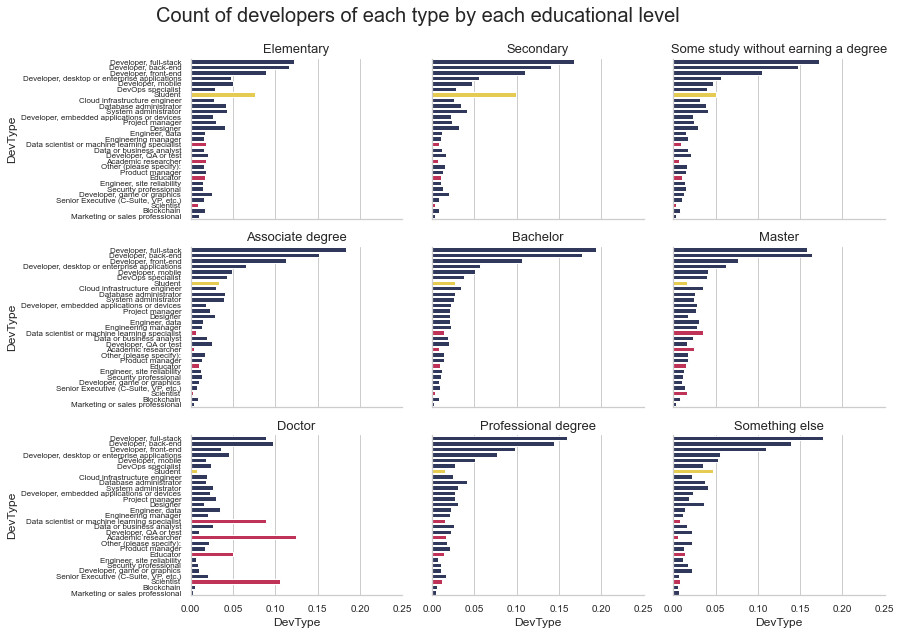

In [56]:
# Doctors are much more inclined to be Scientists, Academic Researchers, data science or machine learning specialist 
# and educators than others developers. Those who have only primary school and secondary school are more propense to be student, 
# probably studying in secondary school and bachelor respectively
g = sns.FacetGrid(exploded_DevType, col = 'EdLevel' , col_wrap = 3, aspect = 1.5, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'DevType', order = order_DevType, palette = palette_DevType);
g.set_yticklabels(labels = order_DevType, fontsize = 10);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontdict = {'fontsize': 10});
g.set_yticklabels(labels = order_DevType, fontdict = {'fontsize': 8});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers of each type by each educational level', fontsize = 20);

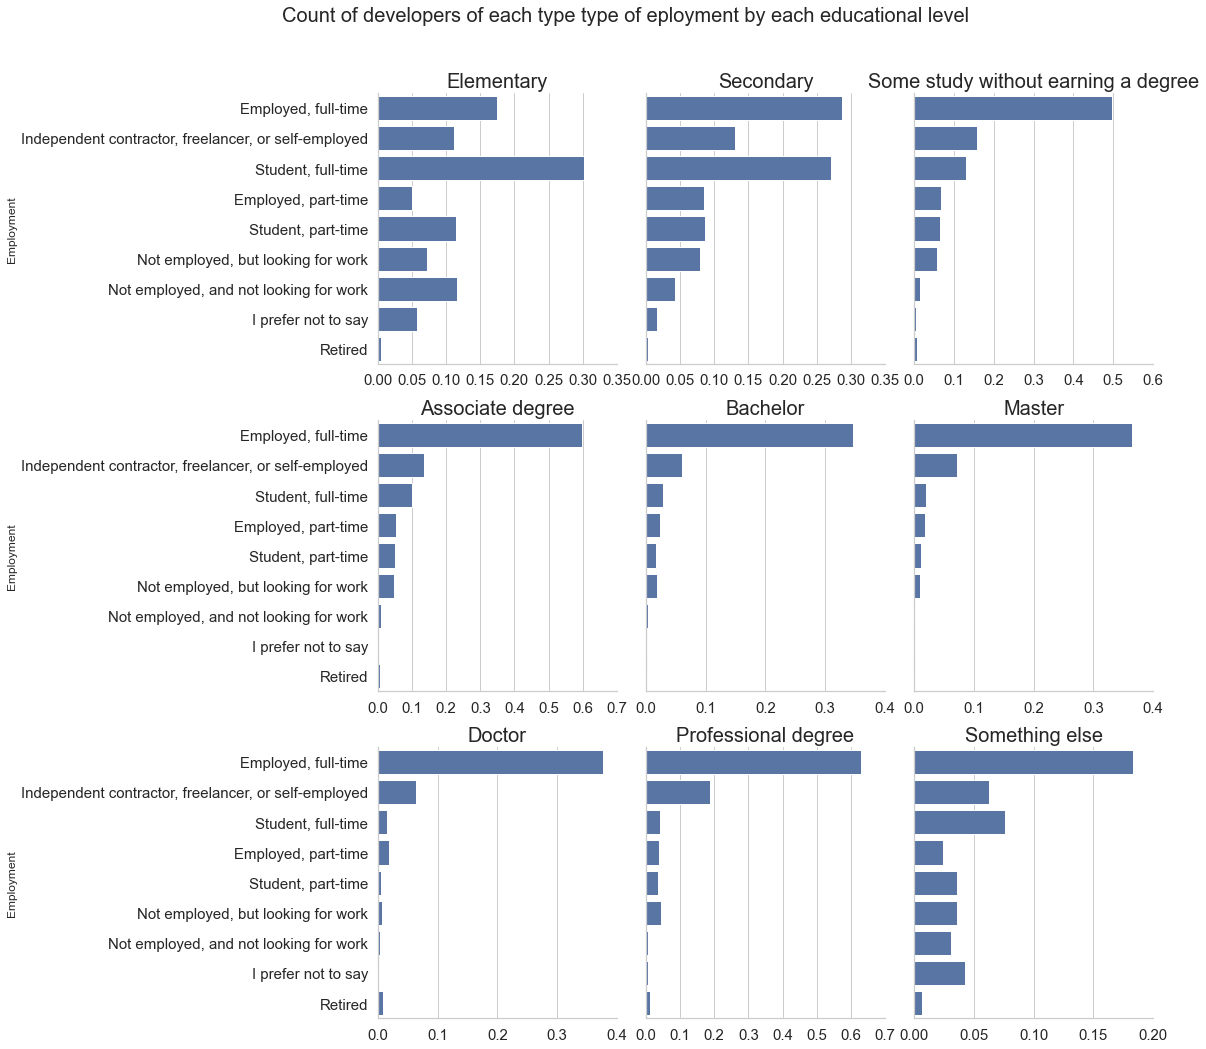

In [57]:
#Relationship between Student and EdLevel as seen above
g = sns.FacetGrid(exploded_Employment, col = 'EdLevel' , sharex = False, col_wrap = 3, height = 5, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'Employment', order = exploded_Employment.Employment.value_counts().index);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontdict = {'fontsize': 15});
g.set_yticklabels(labels = exploded_Employment.Employment.value_counts().index, fontdict = {'fontsize': 15});
g.set_xlabels('')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers of each type type of eployment by each educational level', fontsize = 20);


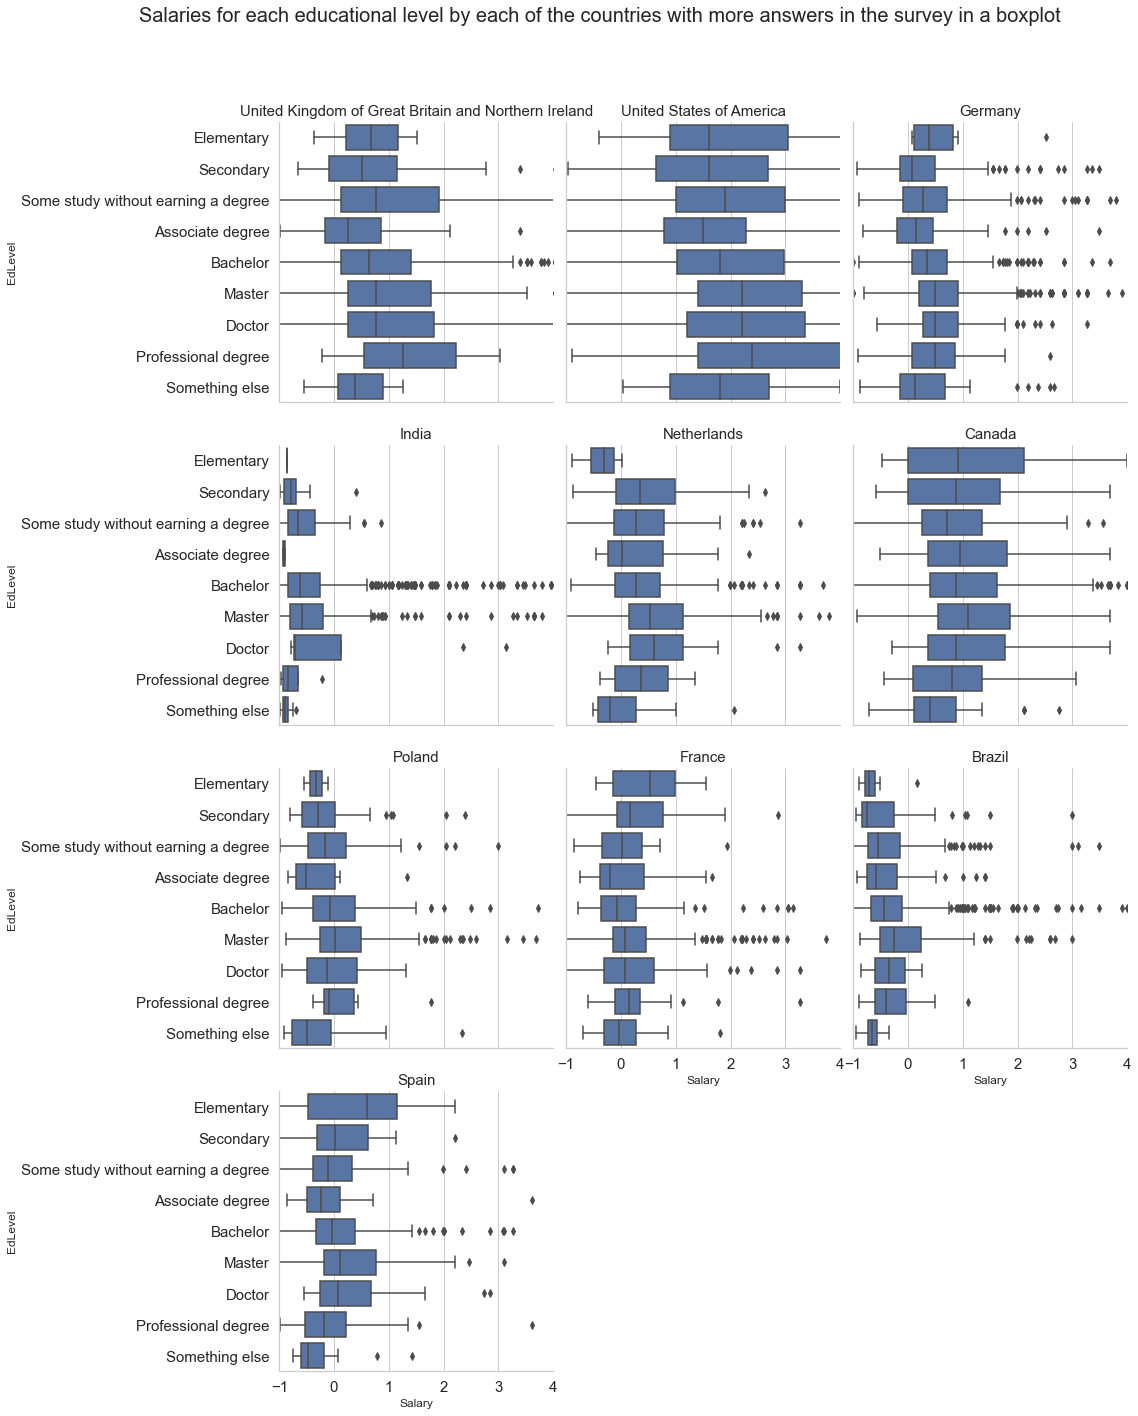

In [58]:
g = sns.FacetGrid(data = top_10_countries, col = 'Country', col_order = top_10_countries.Country.unique(), col_wrap = 3, height = 5);
g.map_dataframe(sns.boxplot, x = 'Salary', y = 'EdLevel', order = order_EdLevel);
g.set(xlim = (0, 250000));
g.set_titles(col_template = '{col_name}', size = 15);
g.set_xticklabels(fontdict = {'fontsize': 15});
g.set_yticklabels(fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salaries for each educational level by each of the countries with more answers in the survey in a boxplot', fontsize = 20);

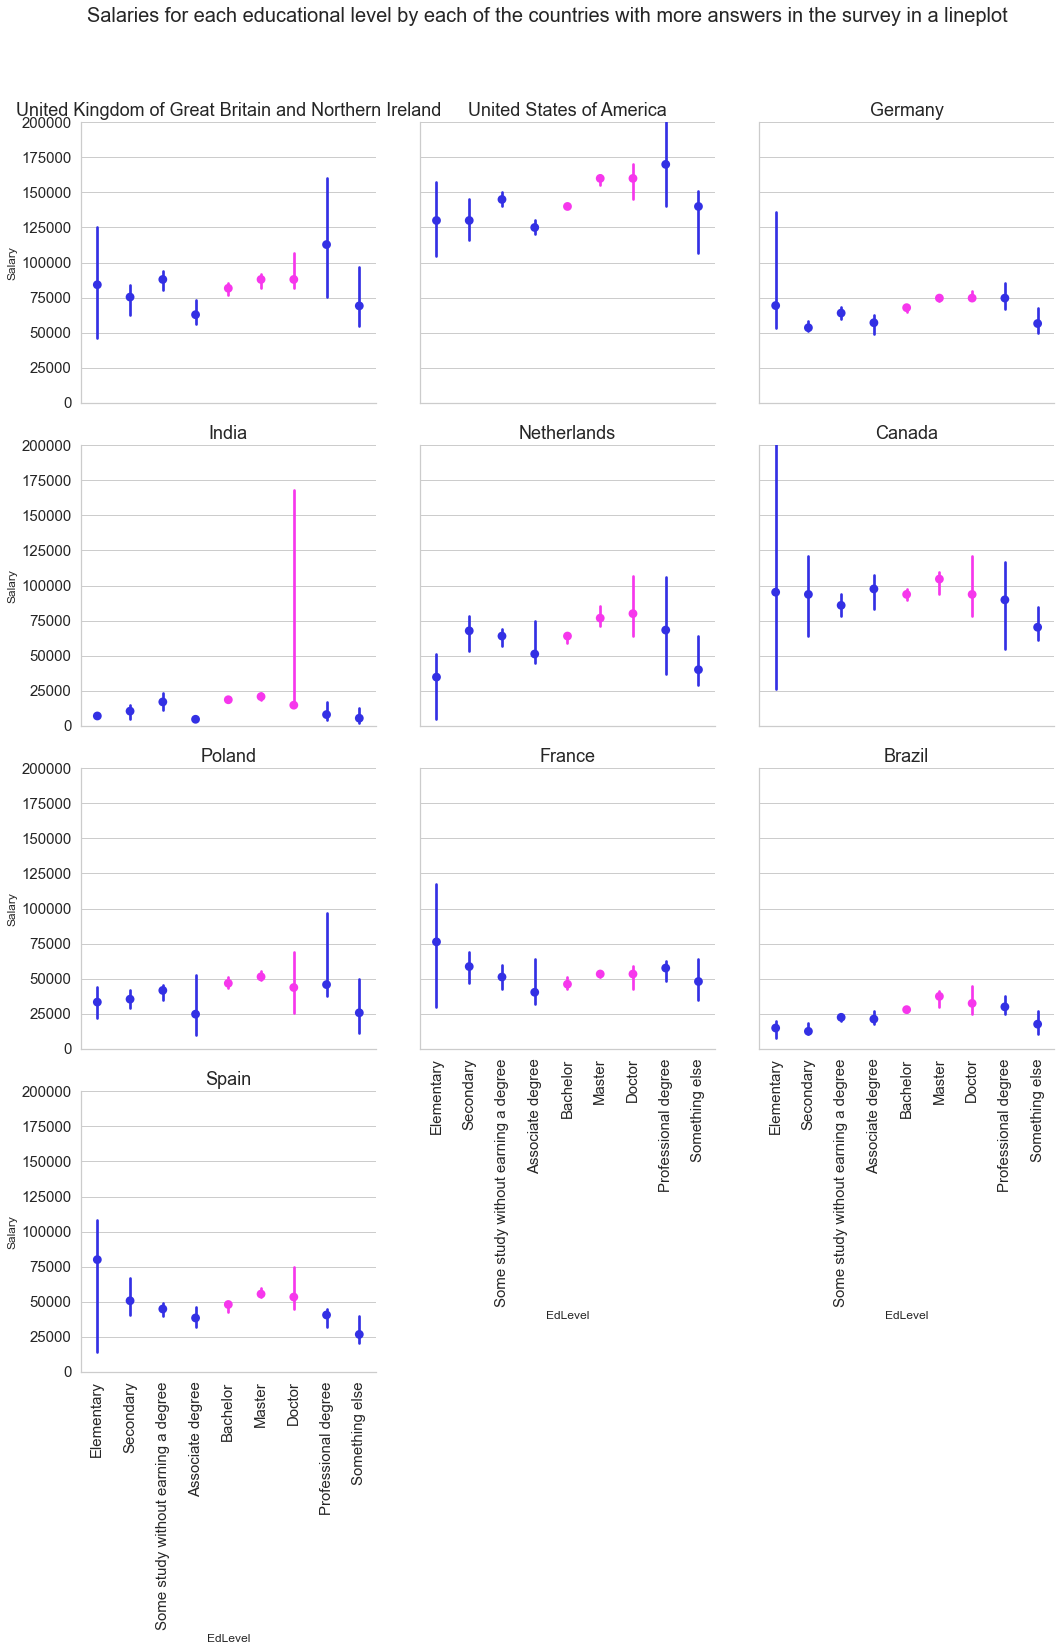

In [59]:
#Doctors, in most of those top 10 countries earn less than masters. Which diverges of the entire dataset analysis
g = sns.FacetGrid(data = top_10_countries, col = 'Country', col_order = top_10_countries.Country.unique(), col_wrap = 3, height = 5);
g.map_dataframe(sns.pointplot, y = 'Salary',x = 'EdLevel', estimator = np.median, order = order_EdLevel, palette = palette_EdLevel);
g.set(ylim = (0, 200000));
g.set_titles(col_template = '{col_name}', size = 18);
g.set_xticklabels(rotation = 90, fontdict = {'fontsize': 15});
g.set_yticklabels(labels = range(0, 225000, 25000), fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salaries for each educational level by each of the countries with more answers in the survey in a lineplot', fontsize = 20);